# Timing things!

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)  # (width, height) in inches
import seaborn
import time
import timeit
from mzsql import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Build databases
turn_mzml_sqlite("../demo_data/180205_Poo_TruePoo_Full1.mzML", "../demo_data/180205_Poo_TruePoo_Full1.sqlite")
turn_mzml_sqlite("../demo_data/180205_Poo_TruePoo_Full1.mzML", "../demo_data/180205_Poo_TruePoo_Full1_mzidx.sqlite", ordered="mz")
turn_mzml_sqlite("../demo_data/180205_Poo_TruePoo_Full1.mzML", "../demo_data/180205_Poo_TruePoo_Full1_rtidx.sqlite", ordered="rt")
turn_mzml_duckdb("../demo_data/180205_Poo_TruePoo_Full1.mzML", "../demo_data/180205_Poo_TruePoo_Full1.duckdb")
turn_mzml_duckdb("../demo_data/180205_Poo_TruePoo_Full1.mzML", "../demo_data/180205_Poo_TruePoo_Full1_mzidx.duckdb", ordered="mz")
turn_mzml_duckdb("../demo_data/180205_Poo_TruePoo_Full1.mzML", "../demo_data/180205_Poo_TruePoo_Full1_rtidx.duckdb", ordered="rt")

'../demo_data/180205_Poo_TruePoo_Full1_rtidx.duckdb'

In [3]:
functions = [
    ("pyteomics", "mzml_pyteomics", ".mzML"),
    ("pyteomics\n(idx mzML)", "mzml_pyteomics", "_idx.mzML"),
    ("pyopenms", "mzml_pyopenms", ".mzML"),
    ("pyopenms\n(idx mzML)", "mzml_pyopenms", "_idx.mzML"),
    ("pyopenms_2d", "mzml_pyopenms_2DPeak", ".mzML"), # Need to remove these for spectrum extraction
    ("pyopenms_2d\n(idx mzML)", "mzml_pyopenms_2DPeak", "_idx.mzML"),
    ("pymzml", "mzml_pymzml", ".mzML"),
    ("pymzml\n(idx mzML)", "mzml_pymzml", "_idx.mzML"),
    ("mzMLb", "mzmlb", ".mzMLb"),
    ("mzDB", "mzdb", ".raw.mzDB"),
    ("MZA", "mza", ".mza"),
    ("MZA (package)", "mzapy", ".mza"),
    ("mz5 (*)", "mz5", ".mz5"),
    ("SQLite\n(unindexed)", "sqlite", ".sqlite"),
    ("SQLite\n(m/z indexed)", "sqlite", "_mzidx.sqlite"),
    ("SQLite\n(RT indexed)", "sqlite", "_rtidx.sqlite"),
    ("DuckDB\n(unsorted)", "duckdb", ".duckdb"),
    ("DuckDB\n(m/z sorted)", "duckdb", "_mzidx.duckdb"),
    ("DuckDB\n(RT sorted)", "duckdb", "_rtidx.duckdb"),
    ("MZTree (+)", "mztree", "http://172.27.178.175:4568"), # Also needs to be removed for spectrum 
    ("mzMD (+)", "mzMD", "http://172.27.178.175:4567")
]

### Chromatograms

In [4]:
def time_chrom(fun_suffix, file_ending):
    if(file_ending.startswith("http")):
        rep_function = f"get_chrom_{fun_suffix}('{file_ending}', 118.0865, 10)"
    else:
        rep_function = f"get_chrom_{fun_suffix}('../demo_data/180205_Poo_TruePoo_Full1{file_ending}', 118.0865, 10)"
    print(f"Running {fun_suffix}", end="\r")
    start_time = time.time()
    time_vals = timeit.repeat(rep_function, globals=globals(), number=1, repeat=10)
    elapsed = time.time() - start_time
    print(f"Running {fun_suffix}... ({elapsed:.2f}s)")
    return(time_vals)

Running mzml_pyteomics... (15.55s)
Running mzml_pyteomics... (17.28s)
Running mzml_pyopenms... (10.79s)
Running mzml_pyopenms... (10.51s)
Running mzml_pyopenms_2DPeak... (3.56s)
Running mzml_pyopenms_2DPeak... (3.63s)
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
Running mzml_pymzml... (14.10s)
Running mzml_pymzml... (12.78s)
Running mzmlb... (13.08s)
Running mzdb... (2.66s)
Running mza... (16.25s)
Runn

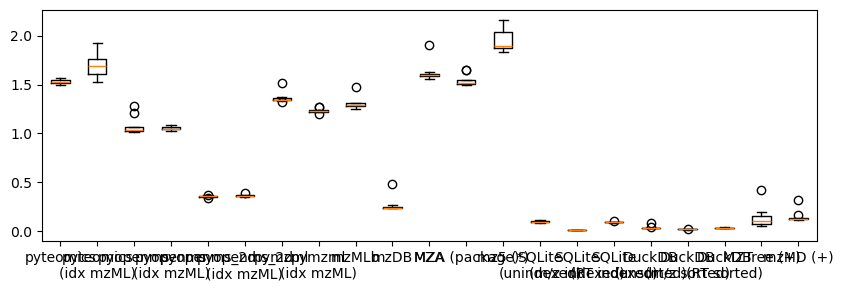

In [5]:
chrom_timing_dict = {name: time_chrom(suffix, filetype) for name, suffix, filetype in functions}

plt.boxplot(chrom_timing_dict.values(), labels=chrom_timing_dict.keys())
plt.show()

In [6]:
pd.DataFrame(chrom_timing_dict).to_csv("chrom_timing_data.csv", index=False)

## Spectrum extraction

In [7]:
def time_spec(fun_suffix, file_ending):
    if(file_ending.startswith("http")):
        rep_function = f"get_spec_{fun_suffix}('{file_ending}', 118.0865, 10)"
    else:
        rep_function = f"get_spec_{fun_suffix}('../demo_data/180205_Poo_TruePoo_Full1{file_ending}', 3)"
    print(f"Running {fun_suffix}", end="\r")
    start_time = time.time()
    time_vals = timeit.repeat(rep_function, globals=globals(), number=1, repeat=10)
    elapsed = time.time() - start_time
    print(f"Running {fun_suffix}... ({elapsed:.2f}s)")
    return(time_vals)

Running sqlite... (0.69s)
Running mzapy... (0.25s)
Running mzml_pymzml... (0.08s)
Running mza... (0.01s)
Running duckdb... (0.17s)
Running mzml_pyteomics... (0.88s)
Running sqlite... (0.75s)
Running duckdb... (0.24s)
Running sqlite... (0.77s)
Running mzml_pyteomics... (0.73s)
Running mz5... (0.02s)
Running duckdb... (0.15s)
Running mzml_pymzml... (1.43s)
Running mzmlb... (0.31s)
Running mzdb... (4.89s)
Running mzml_pyopenms... (3.83s)
Running mzml_pyopenms... (3.79s)


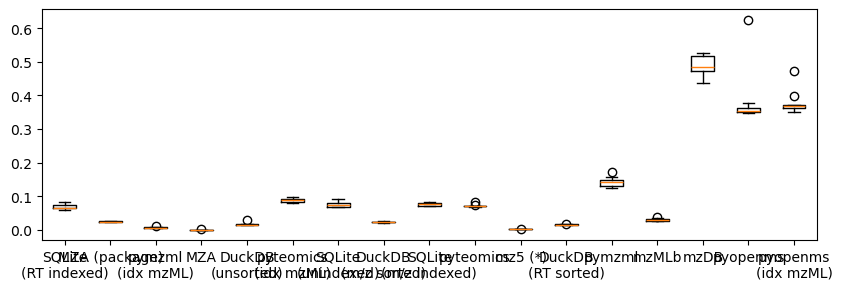

In [8]:
nospec_functions = {
    ("pyopenms_2d", "mzml_pyopenms_2DPeak", ".mzML"),
    ("pyopenms_2d\n(idx mzML)", "mzml_pyopenms_2DPeak", "_idx.mzML"),
    ("MZTree (+)", "mztree", "http://172.27.178.175:4568"),
    ("mzMD (+)", "mzMD", "http://172.27.178.175:4567")
}

spec_timing_dict = {name: time_spec(suffix, filetype) for name, suffix, filetype in list(set(functions) - nospec_functions)}

plt.boxplot(spec_timing_dict.values(), labels=spec_timing_dict.keys())
plt.show()

In [9]:
pd.DataFrame(spec_timing_dict).to_csv("spec_timing_data.csv", index=False)

## RT range extraction

In [10]:
def time_rtrange(fun_suffix, file_ending):
    if(file_ending.startswith("http")):
        rep_function = f"get_rtrange_{fun_suffix}('{file_ending}', 6.5, 8)"
    else:
        rep_function = f"get_rtrange_{fun_suffix}('../demo_data/180205_Poo_TruePoo_Full1{file_ending}', 6.5, 8)"
    print(f"Running {fun_suffix}", end="\r")
    start_time = time.time()
    time_vals = timeit.repeat(rep_function, globals=globals(), number=1, repeat=10)
    elapsed = time.time() - start_time
    print(f"Running {fun_suffix}... ({elapsed:.2f}s)")
    return(time_vals)

Running mzml_pyteomics... (9.92s)
Running mzml_pyteomics... (9.59s)
Running mzml_pyopenms... (4.10s)
Running mzml_pyopenms... (4.12s)
Running mzml_pyopenms_2DPeak... (3.65s)
Running mzml_pyopenms_2DPeak... (3.68s)
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
Running mzml_pymzml... (5.22s)
Running mzml_pymzml... (4.04s)
Running mzmlb... (7.58s)
Running mzdb... (26.10s)
Running mza... (8.76s)
Running mza

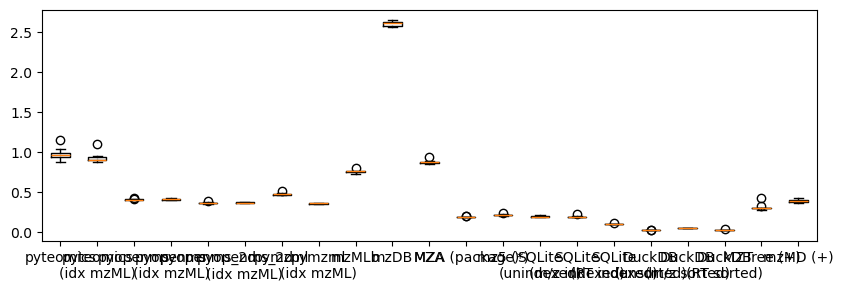

In [13]:
rtrange_timing_dict = {name: time_rtrange(suffix, filetype) for name, suffix, filetype in functions}

plt.boxplot(rtrange_timing_dict.values(), labels=rtrange_timing_dict.keys())
plt.show()

In [14]:
pd.DataFrame(rtrange_timing_dict).to_csv("rtrange_timing_data.csv", index=False)

## File size information

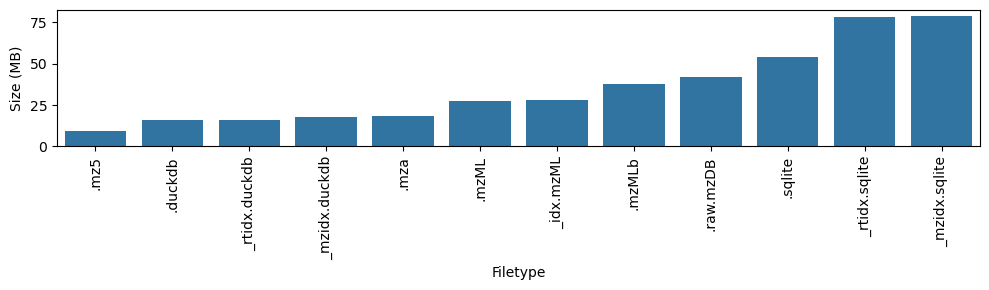

In [15]:
file_names = ["180205_Poo_TruePoo_Full1"+filetype for name, suffix, filetype in functions if not filetype.startswith("http")]
file_sizes = [os.path.getsize('../demo_data/'+x)/1e6 for x in file_names]
file_shortnames = [x.replace("180205_Poo_TruePoo_Full1", "") for x in file_names]

filesize_df = pd.DataFrame({
    "Filetype": file_shortnames,
    "Size (MB)": file_sizes
}).sort_values("Size (MB)")
seaborn.barplot(x='Filetype', y='Size (MB)', data=filesize_df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Cleanup

In [16]:
os.remove("../demo_data/180205_Poo_TruePoo_Full1.sqlite")
os.remove("../demo_data/180205_Poo_TruePoo_Full1_mzidx.sqlite")
os.remove("../demo_data/180205_Poo_TruePoo_Full1_rtidx.sqlite")
os.remove("../demo_data/180205_Poo_TruePoo_Full1.duckdb")
os.remove("../demo_data/180205_Poo_TruePoo_Full1_mzidx.duckdb")
os.remove("../demo_data/180205_Poo_TruePoo_Full1_rtidx.duckdb")